# <span style="color:red"> Numerical Simulation Laboratory</span>
## <span style="color:orange">  Numerical exercises 5: Samuele Voltan's notebook.</span>


In [1]:
# LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# FUNCTIONS
def error(AV, AV2, n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

def block_method(data): # Function for blocking method data analysis
    sum_prog = 0.
    sum2_prog = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        AV = sum_prog / (i+1)
        AV2 = sum2_prog / (i+1)
        y[i,0] = AV
        y[i,1] = error(AV, AV2, i)
    return y

In [3]:
# DATA FILES
far100 = np.loadtxt("data/lab05/ex05.1/far_psi100.out")
far210 = np.loadtxt("data/lab05/ex05.1/far_psi210.out")
near100 = np.loadtxt("data/lab05/ex05.1/near_psi100.out")
near210 = np.loadtxt("data/lab05/ex05.1/near_psi210.out")
far_points100 = np.loadtxt("data/lab05/ex05.1/far_psi100_points.out")
far_points210 = np.loadtxt("data/lab05/ex05.1/far_psi210_points.out")
near_points100 = np.loadtxt("data/lab05/ex05.1/near_psi100_points.out")
near_points210 = np.loadtxt("data/lab05/ex05.1/near_psi210_points.out")

### <span style="color:red"> Exercise 05.1
The wave functions of the eigenstates of an electron in a Hydrogen atom are expressed in terms of spherical harmonics and generalized Laguerre polynomials. 
For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ *in Cartesian coordinates* using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties. 
    Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

### <span style="color:orange"> Solution

The class <code>Random</code> is already provided with a uniform (<code>Random::Rannyu</code>) sampling method and a normal sampling method (<code>Random::Gauss</code>). After updating the class by adding the methods <code>Random::Metropolis</code> and <code>Random::Tune</code>, we can perform the simulation. In order to set the starting position, I also provided the class with a new method <code>Random::Sperical3D</code> that generates a point in 3D space given the distance from the origin.

In [4]:
title = ['Uniform sampling', "Normal sampling"]
x = np.arange(100)

# $\psi_{100}$

Uniform sampling r = 1.4978 ± 0.0013
Normal sampling r = 1.4999 ± 0.0014


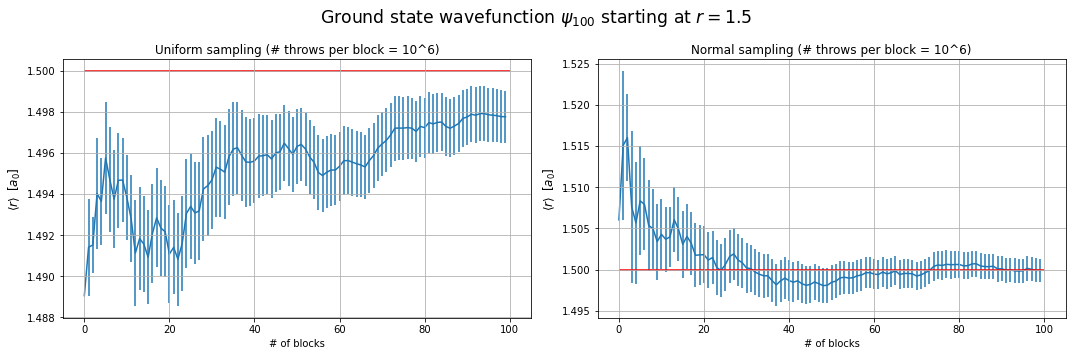

In [5]:
plt.figure(figsize=(15,5))
plt.suptitle("Ground state wavefunction $\psi_{100}$ starting at $r = 1.5$", fontsize = "xx-large")
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i]+' (# throws per block = 10^6)')
    y = block_method(near100[:,i])
    plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
    plt.hlines(1.5, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"# of blocks")
    plt.ylabel(r"$\langle r\rangle\,\,\,[a_0]$", fontsize = "large")
    print(title[i] + f" r = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
    plt.grid(True)
plt.tight_layout()
plt.plot();

Note that uniform sampling gives a result for $\langle r \rangle$ that is within $2\sigma$ from the expected value. Normal sampling's result is compatible with theory.

Uniform sampling r = 1.4984 ± 0.0013
Normal sampling r = 1.5003 ± 0.0014


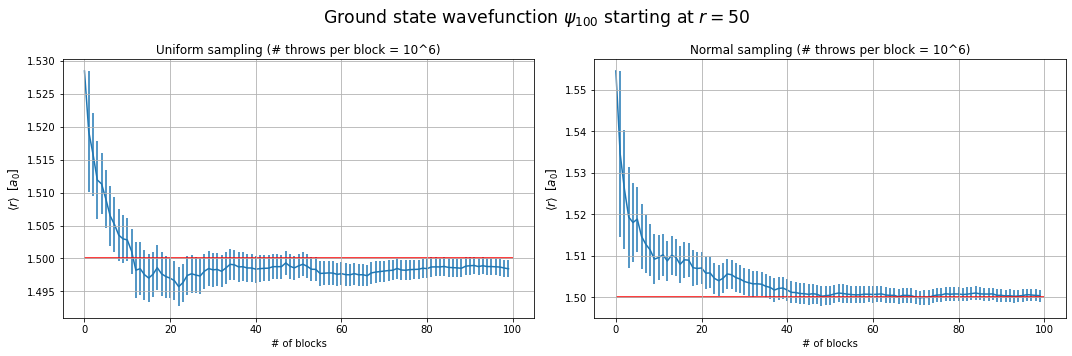

In [6]:
plt.figure(figsize=(15,5))
plt.suptitle("Ground state wavefunction $\psi_{100}$ starting at $r = 50$", fontsize = "xx-large")
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i]+' (# throws per block = 10^6)')
    y = block_method(far100[:,i])
    plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
    plt.hlines(1.5, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"# of blocks")
    plt.ylabel(r"$\langle r\rangle\,\,\,[a_0]$", fontsize = "large")
    plt.grid(True)
    print(title[i] + f" r = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
plt.tight_layout()
plt.plot();

The trend of the curves and the small errorbars suggest that, when starting far from the expected value, the data blocking technique needs more throws per block in order to produce reliable data.

# $\psi_{210}$

Uniform sampling r = 4.9961 ± 0.0031
Normal sampling r = 4.9955 ± 0.0029


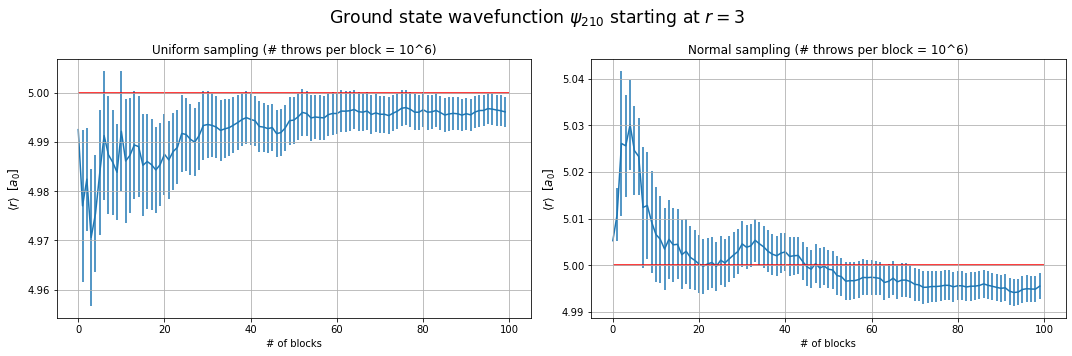

In [7]:
plt.figure(figsize=(15,5))
plt.suptitle("Ground state wavefunction $\psi_{210}$ starting at $r = 3$", fontsize = "xx-large")
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i]+' (# throws per block = 10^6)')
    y = block_method(near210[:,i])
    plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
    plt.hlines(5, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"# of blocks")
    plt.ylabel(r"$\langle r\rangle\,\,\,[a_0]$", fontsize = "large")
    plt.grid(True)
    print(title[i] + f" r = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
plt.tight_layout()
plt.plot();

Both estimations are almost compatible with expected value.

Uniform sampling r = 4.9958 ± 0.0032
Normal sampling r = 4.9971 ± 0.0029


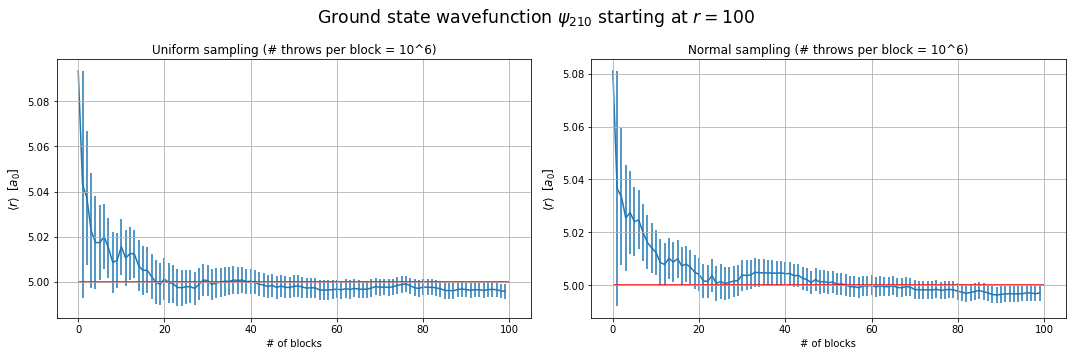

In [8]:
plt.figure(figsize=(15,5))
plt.suptitle("Ground state wavefunction $\psi_{210}$ starting at $r = 100$", fontsize = "xx-large")
for i in range(2) :
    plt.subplot(1, 2, i+1)
    plt.title(title[i]+' (# throws per block = 10^6)')
    y = block_method(far210[:,i])
    plt.errorbar(x,y[:,0], yerr = y[:,1], zorder = 0)
    plt.hlines(5, 0, 100, colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"# of blocks")
    plt.ylabel(r"$\langle r\rangle\,\,\,[a_0]$", fontsize = "large")
    plt.grid(True)
    print(title[i] + f" r = {y[-1, 0]:.4f} ± {y[-1, 1]:.4f}")
plt.tight_layout()
plt.plot();

Considerations for $\psi_{100}$ hold also in this case

Here I show the sampled points for the two orbitals.

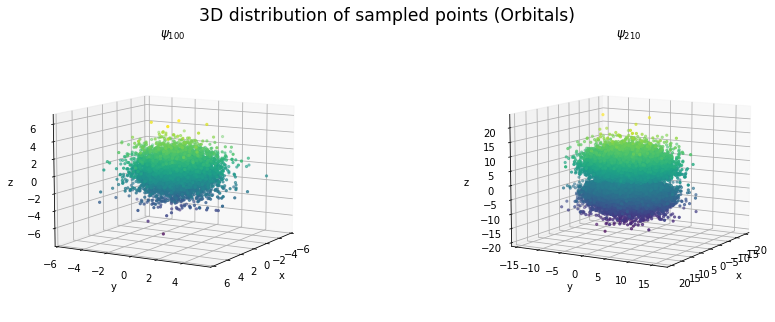

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5), subplot_kw=dict(projection='3d'))
fig.suptitle('3D distribution of sampled points (Orbitals)', fontsize = "xx-large")
ax1.scatter(near_points100[:,0], near_points100[:,1], near_points100[:,2], c = near_points100[:,2], marker = '.')
ax1.set_title('$\psi_{100}$', fontsize="large")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
ax2.scatter(near_points210[:,0], near_points210[:,1], near_points210[:,2], c = near_points210[:,2], marker = '.')
ax2.set_title('$\psi_{210}$', fontsize="large")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)
plt.show()